In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn import metrics

In [2]:
df1 = pd.read_csv("track_points.csv")
df2 = pd.read_csv("track_points1.csv")
df3 = pd.read_csv("track_points2.csv")
df4 = pd.read_csv("Track.csv")
df5 = pd.read_csv("tracks.csv")

In [3]:
df1

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,...,link2_type,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,3.90020,7.44314,0,0,0,213.784,2021/11/05 19:04:52+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.90022,7.44313,0,0,1,213.796,2021/11/05 19:04:53+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.90032,7.44306,0,0,2,213.784,2021/11/05 19:04:53+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.90044,7.44299,0,0,3,213.820,2021/11/05 19:04:54+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.90058,7.44293,0,0,4,213.940,2021/11/05 19:04:55+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,3.86621,7.37299,0,0,1013,179.026,2021/11/05 19:18:43+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,3.86629,7.37302,0,0,1014,179.066,2021/11/05 19:18:44+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,3.86664,7.37317,0,0,1015,179.502,2021/11/05 19:18:46+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,3.86729,7.37344,0,0,1016,178.090,2021/11/05 19:18:50+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,...,link2_type,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,3.90020,7.44314,0,0,0,213.784,2021/11/06 23:15:39+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.90022,7.44313,0,0,1,213.796,2021/11/06 23:15:39+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.90032,7.44306,0,0,2,213.784,2021/11/06 23:15:39+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.90044,7.44299,0,0,3,213.820,2021/11/06 23:15:40+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.90058,7.44293,0,0,4,213.940,2021/11/06 23:15:41+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,3.86621,7.37299,0,0,613,179.026,2021/11/06 23:25:12+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,3.86629,7.37302,0,0,614,179.066,2021/11/06 23:25:13+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,3.86664,7.37317,0,0,615,179.502,2021/11/06 23:25:15+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,3.86729,7.37344,0,0,616,178.090,2021/11/06 23:25:19+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.concat([df1,df3,df5], axis=0)

In [6]:
df4

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,...,link2_type,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,3.94532,7.40412,0,0,0,231.550,2021/11/08 18:30:31+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.94532,7.40417,0,0,1,231.691,2021/11/08 18:30:32+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.94532,7.40431,0,0,2,231.834,2021/11/08 18:30:33+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.94531,7.40433,0,0,3,231.777,2021/11/08 18:30:33+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.94530,7.40441,0,0,4,231.789,2021/11/08 18:30:33+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,3.86621,7.37299,0,0,962,179.026,2021/11/08 18:44:24+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,3.86629,7.37302,0,0,963,179.066,2021/11/08 18:44:25+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,3.86664,7.37317,0,0,964,179.502,2021/11/08 18:44:27+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,3.86729,7.37344,0,0,965,178.090,2021/11/08 18:44:31+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['time'] = pd.to_datetime(df['time'])
df4['time'] = pd.to_datetime(df4['time'])
df2['time'] = pd.to_datetime(df2['time'])

In [8]:
df.head()

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,...,link2_type,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,3.90020,7.44314,0,0,0,213.784,2021-11-05 19:04:52+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.90022,7.44313,0,0,1,213.796,2021-11-05 19:04:53+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.90032,7.44306,0,0,2,213.784,2021-11-05 19:04:53+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.90044,7.44299,0,0,3,213.820,2021-11-05 19:04:54+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.90058,7.44293,0,0,4,213.940,2021-11-05 19:04:55+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['seconds'] =df['time'].map(lambda x: x.second)
df['minutes'] =df['time'].map(lambda x: x.minute)
df4['seconds'] =df4['time'].map(lambda x: x.second)
df4['minutes'] =df4['time'].map(lambda x: x.minute)
df2['seconds'] =df2['time'].map(lambda x: x.second)
df2['minutes'] =df2['time'].map(lambda x: x.minute)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 809
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   X                   2616 non-null   float64            
 1   Y                   2616 non-null   float64            
 2   track_fid           2616 non-null   int64              
 3   track_seg_id        2616 non-null   int64              
 4   track_seg_point_id  2616 non-null   int64              
 5   ele                 2616 non-null   float64            
 6   time                2616 non-null   datetime64[ns, UTC]
 7   magvar              0 non-null      float64            
 8   geoidheight         0 non-null      float64            
 9   name                0 non-null      float64            
 10  cmt                 0 non-null      float64            
 11  desc                0 non-null      float64            
 12  src                 0 non-null     

In [11]:
df

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,...,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,seconds,minutes
0,3.90020,7.44314,0,0,0,213.784,2021-11-05 19:04:52+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,4
1,3.90022,7.44313,0,0,1,213.796,2021-11-05 19:04:53+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,4
2,3.90032,7.44306,0,0,2,213.784,2021-11-05 19:04:53+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,4
3,3.90044,7.44299,0,0,3,213.820,2021-11-05 19:04:54+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,4
4,3.90058,7.44293,0,0,4,213.940,2021-11-05 19:04:55+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,3.86621,7.37299,0,0,805,179.026,2021-11-08 18:55:14+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,55
806,3.86629,7.37302,0,0,806,179.066,2021-11-08 18:55:15+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,55
807,3.86664,7.37317,0,0,807,179.502,2021-11-08 18:55:17+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,55
808,3.86729,7.37344,0,0,808,178.090,2021-11-08 18:55:21+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,55


In [12]:
new_df = df.drop(['time', 'track_seg_point_id', 'track_seg_id', 'track_fid'], axis=1)
df4 = df4.drop(['time', 'track_seg_point_id', 'track_seg_id', 'track_fid'], axis=1)
df2 = df2.drop(['time', 'track_seg_point_id', 'track_seg_id', 'track_fid'], axis=1)

In [13]:
new_df.head(20)

,X,Y,ele,magvar,geoidheight,name,cmt,desc,src,link1_href,...,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,seconds,minutes
0,3.90020,7.44314,213.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,4
1,3.90022,7.44313,213.796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,4
2,3.90032,7.44306,213.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,4
3,3.90044,7.44299,213.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,4
4,3.90058,7.44293,213.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,4
5,3.90087,7.44281,214.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,4
6,3.90123,7.44269,214.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,4
7,3.90204,7.44241,214.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
8,3.90262,7.44222,214.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,5
9,3.90301,7.44209,215.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,5


In [14]:
new_df.dropna(axis=1, inplace=True)
new_df

,X,Y,ele,seconds,minutes
0,3.90020,7.44314,213.784,52,4
1,3.90022,7.44313,213.796,53,4
2,3.90032,7.44306,213.784,53,4
3,3.90044,7.44299,213.820,54,4
4,3.90058,7.44293,213.940,55,4
...,...,...,...,...,...
805,3.86621,7.37299,179.026,14,55
806,3.86629,7.37302,179.066,15,55
807,3.86664,7.37317,179.502,17,55
808,3.86729,7.37344,178.090,21,55


In [15]:
df4.dropna(axis=1, inplace=True)
df2.dropna(axis=1, inplace=True)

In [16]:
contamination = 0.05
data = new_df.copy()
data.shape

(2616, 5)

In [17]:
data = data.sample(frac=1)
data.shape

(2616, 5)

In [18]:
df2

,X,Y,ele,seconds,minutes
0,3.90020,7.44314,213.784,39,15
1,3.90022,7.44313,213.796,39,15
2,3.90032,7.44306,213.784,39,15
3,3.90044,7.44299,213.820,40,15
4,3.90058,7.44293,213.940,41,15
...,...,...,...,...,...
613,3.86621,7.37299,179.026,12,25
614,3.86629,7.37302,179.066,13,25
615,3.86664,7.37317,179.502,15,25
616,3.86729,7.37344,178.090,19,25


In [25]:
def Anomaly():
    model =IsolationForest(contamination=contamination, n_estimators=1000, random_state=4)
    model.fit(data)
    new_df['iforest'] = pd.Series(model.predict(df4))
    new_df["iforest"] = new_df['iforest'].map({1:0, -1:1})
    x = new_df['iforest'].value_counts(normalize=True).iloc[1]
    print(new_df['iforest'].value_counts(normalize=True))
    if x > 0.02:
        print('Red Alert')
    else:
        pass

In [26]:
Anomaly()

0.0    0.830409
1.0    0.169591
Name: iforest, dtype: float64
Red Alert


C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='iforest', ylabel='seconds'>

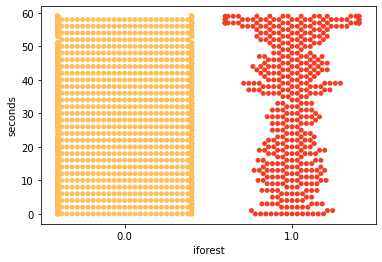

In [27]:
sns.swarmplot(x='iforest', y='seconds', data=new_df, palette='YlOrRd')

In [22]:
new_df.head()

,X,Y,ele,seconds,minutes,iforest
0,3.90020,7.44314,213.784,52,4,0.0
1,3.90022,7.44313,213.796,53,4,0.0
2,3.90032,7.44306,213.784,53,4,0.0
3,3.90044,7.44299,213.820,54,4,0.0
4,3.90058,7.44293,213.940,55,4,0.0


In [23]:
pip install creme

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mmh3==2.5.1 (from creme) (from versions: none)
ERROR: No matching distribution found for mmh3==2.5.1 (from creme)


In [24]:
pip install creme


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mmh3==2.5.1 (from creme) (from versions: none)
ERROR: No matching distribution found for mmh3==2.5.1 (from creme)
